<a href="https://colab.research.google.com/github/viveknarapongu2801/vivek/blob/main/car_evaluation_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libreries
import pandas as pd
import numpy as np
import seaborn as sns # statestical data visualization
import matplotlib.pyplot as plt


**import dataset**

In [ ]:
df=pd.read_csv("/content/car_evaluation.csv",header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


**Explore the data set**

In [ ]:
df.shape

(1728, 7)

In [ ]:
df.describe()

,0,1,2,3,4,5,6
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [ ]:
df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0


**rename the columns**

In [ ]:
col=['buying','maint','door','persons','lug_boot','safety','class']
df.columns=col

In [ ]:
df.head()

,buying,maint,door,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
# get overall information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   door      1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
col=['buying','maint','door','persons','lug_boot','safety','class']
for i in col :
  print(df[i].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
door
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [ ]:
# class is the target variable
# there are 7 varaubles un the data set all are of categorical data type


**Explore the class varaible**

In [ ]:
df['class'].value_counts()

,count
class,
unacc,1210
acc,384
good,69
vgood,65


class is ordinal in nature

**chcek for missing values**

In [ ]:
df.isnull().sum()

,0
buying,0
maint,0
door,0
persons,0
lug_boot,0
safety,0
class,0


we can see that there is no missing values in the data set and checked frequnecy distribustion it aslo confirms that there is no missing values

**Declare the Feature and Target Varible**

In [ ]:
X=df.drop(['class'],axis=1)
y=df['class']

**split the data into training and testing data set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
#check the shape of X_train , X_test
X_train.shape , X_test.shape

((1157, 6), (571, 6))

**Feature engineering** - is the process of transforming raw data into useful features that helps us to undetand our model better and increse its predictive power


first i will check the data types of the variables

In [ ]:
X_train.dtypes

,0
buying,object
maint,object
door,object
persons,object
lug_boot,object
safety,object


**encode the categorical variables**

In [ ]:
X_train.head()

,buying,maint,door,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [ ]:
# we can see that all varibales are ordinal and categorical in nature

In [ ]:
# importing category encoders
!pip install category_encoders
import category_encoders as ce

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.8 MB/s eta 0:00:00


In [ ]:
# encoding the categorical varibles with ordinal encoders
encoder=ce.OrdinalEncoder(cols=['buying','maint','door','persons','lug_boot','safety'])
X_train=encoder.fit_transform(X_train)
X_test=encoder.transform(X_test)

In [ ]:
X_train.head()

,buying,maint,door,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


we are training and test set and read for modelling

**Random forst classifier model with default parameters**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#initiating the classifer
rfc=RandomForestClassifier(random_state=0)
#fit the model
rfc.fit(X_train,y_train)
#predict the test results
y_pred=rfc.predict(X_test)


In [ ]:
#chcek the accuracy score
from sklearn.metrics import accuracy_score
print("model accuracy score with 10 decisin trees : {0:4f}".format(accuracy_score(y_test,y_pred)))

model accuracy score with 10 decisin trees : 0.945709


**Random forest with 100 estimators**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#initiating the classifer
rfc_100=RandomForestClassifier(n_estimators=100,random_state=0)
#fit the model
rfc_100.fit(X_train,y_train)
#predict the test results
y_pred_100=rfc_100.predict(X_test)

#chcek the accuracy score
from sklearn.metrics import accuracy_score
print("model accuracy score with 10 decisin trees : {0:4f}".format(accuracy_score(y_test,y_pred_100)))


model accuracy score with 10 decisin trees : 0.945709


**Find the important features with random forest model**

In [ ]:
#untill now, I have used all the features given in the model.
#Now i will select only the important features buils the model using these features and see its effects on accuracy.

In [ ]:
# first build the model
from sklearn.ensemble import RandomForestClassifier
#initiating the classifier
rfc=RandomForestClassifier(n_estimators=100,random_state=0)
#fit the model
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

**checking most important features**

In [ ]:
feature_scores=pd.Series(rfc.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_scores

,0
safety,0.295319
persons,0.233856
buying,0.151734
maint,0.146653
lug_boot,0.100048
door,0.072389


In [ ]:
# i can say that most imp features is safety and least impotant feature doors


Visualise feature scores

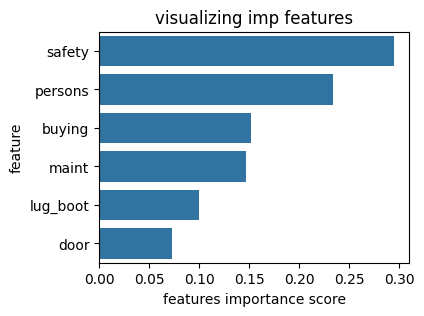

In [ ]:
plt.figure(figsize=(4,3))
sns.barplot(x=feature_scores,y=feature_scores.index)
#adding lables
plt.xlabel('features importance score')
plt.ylabel('feature')
#adding title
plt.title('visualizing imp features')
#visualize
plt.show()

In [ ]:
X = df.drop(['class','door'],axis=1)
y = df['class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
encoder = ce.OrdinalEncoder(cols=['buying','maint','persons','lug_boot','safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate the classifier
rfc_100 = RandomForestClassifier(n_estimators=100,random_state=0)
#fit the model
rfc_100.fit(X_train,y_train)
#predict the test results
y_pred_100 = rfc_100.predict(X_test)

from sklearn.metrics import accuracy_score
print("model accuracy score with 100 decision trees : {0:4f}".format(accuracy_score(y_test,y_pred_100)))

model accuracy score with 100 decision trees : 0.926445


**confusion metrics**

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_100)
print('confusion matrix \n\n',cm)

confusion matrix 

 [[104  12  10   3]
 [  0  18   0   2]
 [ 10   0 387   0]
 [  3   2   0  20]]


**classification report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_100))

              precision    recall  f1-score   support

         acc       0.89      0.81      0.85       129
        good       0.56      0.90      0.69        20
       unacc       0.97      0.97      0.97       397
       vgood       0.80      0.80      0.80        25

    accuracy                           0.93       571
   macro avg       0.81      0.87      0.83       571
weighted avg       0.93      0.93      0.93       571

